<a href="https://colab.research.google.com/github/Ashishjayswal/DataSet/blob/main/Principal_Component_Analysis(PCA)_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning to implement PCA in python

$\textbf{Mantadory}$ steps to PCA in python are:

1. Load dataset. If data set is not standardize then first standardize the data set.
2. Use scikit learn to use built in PCA function
3. Pass number of principal components required for given data set to the PCA function in Scikit learn
4. Fit the function to the data set
5. Transform the data

$\textbf{Additional}$ functionality PCA function in scikit learn  are:

1. Printing principal components
2. Scree plot to identify right number of PC's that describe the dataset by looking at cumulative explained variance ratio
3. Biplot to determine impact of each featur on PC




$\textbf{Loading libraries}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

$\textbf{Loading data set.}$

In [2]:
df=pd.read_csv("/content/Pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


**Start Preprocessing**

In [3]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [4]:
df["Type 2"].mode()

0    Flying
dtype: object

In [5]:
df["Type 2"].fillna("Flying",inplace=True)

In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [8]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [9]:
df = pd.DataFrame(df)
df.columns  = ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
print(df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire  Flying    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [10]:
df.shape

(800, 13)

In [11]:
df.rename(columns = {'Type 1':'Type1', 'Type 2':'Type2'}, inplace = True)

In [12]:
df.columns

Index(['#', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Name = le.fit_transform(df.Name.values) 

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Type1 = le.fit_transform(df.Type1.values) 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Type2 = le.fit_transform(df.Type2.values) 

In [16]:
df.isnull().sum()

#             0
Name          0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

$\textbf{Fitting and tranforming the data set into desired number of dimensionas by controlling the paramter
n_components}$

Important functions corresponding to implementation of PCA are:

1. Fit : fits the data to the required number of PCs
2. Transform: transform the data along PCs discovered

In [24]:
pca = PCA(n_components=5) 
pca.fit(df) 
data_new = pca.transform(df)
print(data_new.shape)

(800, 5)


$\textbf{Examining PCs and the variance expained by them}$

Important functions corresponding to PCA in scikit learn are:

1. components_  : gives PCs for given data set
2. explaiined_variance_ratio: Explains variance explained by each PC



In [25]:
print(pca.explained_variance_ratio_ *100) 
print('Printing the relation of PC''s and variables present in the data set')
print("................................................................")

All_PCs = pd.DataFrame(pca.components_)
print(All_PCs)

All_PCs.columns  = ['#', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
index1 = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
All_PCs = pd.DataFrame(All_PCs)
All_PCs.index= index1


print("..................................................")
print("The linear equations of Principal components are: ")
print("..................................................")
print('PC1' + '=' + str(np.round(All_PCs.iloc[0,0],2)) + '*' + '#' +  '+' + str(np.round(All_PCs.iloc[0,1],2)) + '*' + 'Name' + '+' +  str(np.round(All_PCs.iloc[0,2],2)) + '*' + 'Type1' + '+' + str(np.round(All_PCs.iloc[0,3],2)) + '*' + 'Type2' +  '+' + str(np.round(All_PCs.iloc[0,4],2)) + '*' + 'Total')

print('PC2' + '=' + str(np.round(All_PCs.iloc[1,0],2)) + '*' + '#' +  '+' + str(np.round(All_PCs.iloc[1,1],2)) + '*' + 'Name' + '+' +  str(np.round(All_PCs.iloc[1,2],2)) + '*' + 'Type1' + '+' + str(np.round(All_PCs.iloc[1,3],2)) + '*' + 'Type2' +  '+' + str(np.round(All_PCs.iloc[1,4],2)) + '*' + 'Total')
print('PC3' + '=' + str(np.round(All_PCs.iloc[2,0],2)) + '*' + '#' +  '+' + str(np.round(All_PCs.iloc[2,1],2)) + '*' + 'Name' + '+' +  str(np.round(All_PCs.iloc[2,2],2)) + '*' + 'Type1' + '+' + str(np.round(All_PCs.iloc[2,3],2)) + '*' + 'Type2' +  '+' + str(np.round(All_PCs.iloc[2,4],2)) + '*' + 'Total')
print('PC4' + '=' + str(np.round(All_PCs.iloc[3,0],2)) + '*' + '#' +  '+' + str(np.round(All_PCs.iloc[3,1],2)) + '*' + 'Name' + '+' +  str(np.round(All_PCs.iloc[3,2],2)) + '*' + 'Type1' + '+' + str(np.round(All_PCs.iloc[3,3],2)) + '*' + 'Type2' + '+' + str(np.round(All_PCs.iloc[3,4],2)) + '*' + 'Total')
print('PC4' + '=' + str(np.round(All_PCs.iloc[3,0],2)) + '*' + '#' +  '+' + str(np.round(All_PCs.iloc[3,1],2)) + '*' + 'Name' + '+' +  str(np.round(All_PCs.iloc[4,2],2)) + '*' + 'Type1' + '+' + str(np.round(All_PCs.iloc[4,3],2)) + '*' + 'Type2' + '+' + str(np.round(All_PCs.iloc[4,4],2)) + '*' + 'Total')


[46.35951318 37.08439751 14.03594759  0.86190925  0.62549612]
Printing the relation of PCs and variables present in the data set
................................................................
         0         1         2         3         4         5         6   \
0 -0.220356  0.972452 -0.001127  0.000352 -0.069617 -0.005838 -0.018140   
1  0.968533  0.227310 -0.002892 -0.001055  0.092885  0.016164  0.019561   
2 -0.114977  0.051166  0.001491  0.000034  0.916720  0.119717  0.181903   
3 -0.007473 -0.001318  0.021203  0.021825  0.003971  0.037223  0.069260   
4  0.000567 -0.000875  0.010791  0.013413  0.003470 -0.061699 -0.736943   

         7         8         9         10        11        12  
0 -0.009276 -0.015589 -0.013673 -0.007101 -0.001645 -0.000007  
1  0.018695  0.018397  0.014833  0.005236  0.007571  0.000253  
2  0.145297  0.187586  0.151986  0.130230 -0.001797  0.001029  
3  0.692174 -0.389308  0.171468 -0.576845 -0.000609 -0.000850  
4  0.034511  0.378715  0.535446 -0.

$\textbf{Identifying best number of principal components based on variance explained by them using scree plot}$

Text(0.5, 1.0, 'Scree plot')

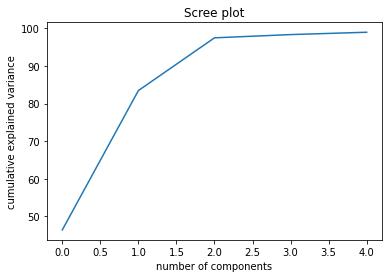

In [27]:
Variance_Explaied=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100) 
plt.plot(Variance_Explaied)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree plot')

$\textbf{Plotting Biplot}$ 

Biplot is a visual representation that shows the contribution of different features on principal components. 


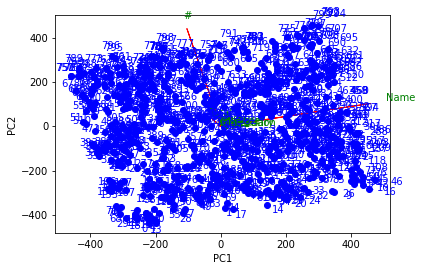

In [26]:
PC1 = All_PCs.iloc[0]
PC2 = All_PCs.iloc[1]

xs =data_new[:,0]
ys = data_new[:,1]

for i in range(len(PC1)):
    plt.arrow(0, 0, PC1[i]*max(xs), PC2[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(PC1[i]*max(xs)*1.1, PC2[i]*max(ys)*1.1,
             list(df.columns.values)[i], color='g')
    
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.1, ys[i]*1.1, list(df.index)[i], color='b')    
figersize=(20,15)    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()